# **Laborator 6: Analiza Componentelor Principale**

În această lucrare de laborator se descrie metoda de Analiză a Componentelor Principale (Principal Component Analysis – PCA). Această metodă se utilizează pentru reducerea dimensionalității, compresia și vizualizarea datelor. Pentru realizarea acestei lucrări de laborator este necesară o bibliotecă care să calculeze valorile și vectorii proprii ale unei matrice (descompunerea în valori proprii).

## Fundamente teoretice

Se consideră un set de puncte de date într-un spațiu de dimensiune mare (ND). Fiecare vector reprezintă trăsăturile unui exemplu de antrenare. Scopul acestei metode este reducerea dimensionalității punctelor la o dimensiune mai mică KD în așa fel încât să se păstreze cât mai multă informație cu putință. Ideea PCA este de a găsi principalele K axe de variație, astfel încât după proiecția datelor într-un spațiu mai redus, varianța datelor proiectate sa fie maximizată. Iniţial vom considera un exemplu bidimensional: se afișează datele colectate despre cât de mult apreciază anumite persoane niște activități și aptitudinea lor în domeniul respectiv. Figura de mai jos ilustrează un exemplu simplificat [2]. 

Să analizăm cei doi vectori $u_1$ și $u_2$ . Dacă se proiectează punctele 2D pe vectorul $u_2$ se obțin valori scalare cu o împrăștiere redusă (deviație standard mică). În schimb, dacă se proiectează punctele pe u1 punctele sunt mult mai împrăștiate. Dacă ar trebui să reducem datele la o singură dimensiune, atunci ar fi preferabil să le proiectăm pe $u_1$ întrucât datele sunt mai ușor separabile iar varianța este mai mare.

<p align="center">
    <img src="imgs/proiectie.png" alt="image" width="300"/>
</p>

Exprimat într-un mod mai formal, fiecare punct bidimensional poate fi scris ca:

$$
\mathbf{x} = \langle \mathbf{x}, \mathbf{u}_1 \rangle \frac{\mathbf{u}_1}{\|\mathbf{u}_1\|} + \langle \mathbf{x}, \mathbf{u}_2 \rangle \frac{\mathbf{u}_2}{\|\mathbf{u}_2\|}
$$

În ecuația de mai sus punctul x a fost proiectat pe fiecare vector și apoi rezultatele obținute au fost însumate. Produsul scalar $〈x,u_i〉$ definește magnitudinea proiecției și trebuie normalizat cu norma vectorului $‖u_i‖$; cei doi vectori definesc direcțiile. Această exprimare este posibilă deoarece $u_1$ și $u_2$ sunt vectori perpendiculari. Dacă se pune condiția ca cei doi vectori să fie vectori unitate, atunci termenul de normalizare dispare. Pentru mai multe exemple de proiecţie vedeți [4].
Ideea principală a reducerii dimensionalității datelor este să se utilizeze cele mai mari proiecții. Întrucât proiecțiile pe $u_2$ vor fi mai mici, x se poate aproxima folosind doar primul termen:

$$
\tilde{\mathbf{x}}_1 = \langle \mathbf{x}, \mathbf{u}_1 \rangle \frac{\mathbf{u}_1}{\|\mathbf{u}_1\|}
$$

În general, fiind dată o bază ortonormală a unui spațiu vectorial cu d dimensiuni B cu vectorii de bază $b_i$ , orice vector se poate scrie ca:

$$
\mathbf{x} = \sum_{i=1}^{d} \langle \mathbf{x}, \mathbf{b}_i \rangle \mathbf{b}_i = \sum_{i=1}^{d} \left(\mathbf{x}^T \mathbf{b}_i \right) \mathbf{b}_i
$$

Problema revine acum să determinăm vectorii de bază pe care se vor realiza proiecțiile. Întrucât scopul principal este maximizarea varianței dintre punctele rezultate în urma transformării, matricea de covarianță ne poate oferi informațiile necesare. Matricea de covarianță este definită ca:

$$
C = \frac{1}{n-1} (I - \mu)^T \cdot (I - \mu)
$$

Pasul următor este găsirea axelor de-a lungul cărora covarianța este maximă. Descompunerea în valori proprii ale unei matrice ne furnizează aceste informații. Astfel, vectorul propriu corespunzător celei mai mare valori proprii va reprezenta prima axă principală și așa mai departe.

Intuitiv, (aproape) orice matrice poate fi vizualizată ca o rotație urmată de o scalare de-a lungul axelor și rotația inversă. Descompunerea în vectori și valorilor proprii calculează această descompunere a matricei de covarianță:

$$
C = Q \Lambda Q^T = \sum_{i=1}^{d} \lambda_i Q_i Q_i^T
$$

unde Q este o matrice de rotație de dimensiune $d \times d$ (ortonormală) și Λ este o matrice diagonală ale cărei elemente reprezintă scalarea de-a lungul fiecărei axe. Elementele se numesc valori proprii și fiecare coloană corespunzătoare din Q este vectorul propriu corespunzător. Deoarece scopul principal este menținerea proiecțiilor cu varianță maximă, valorile proprii se ordonează descrescător în funcție de magnitudinea lor și se aleg primele k valori proprii. Astfel C poate fi aproximat ca:

$$
\tilde{C}_k = Q_{1:k} \Lambda_{1:k} Q_{1:k}^T = \sum_{i=1}^{k} \lambda_i Q_i Q_i^T
$$

unde $Q_{(1:k)}$ este o matrice de dimensiune $d \times k$ cu primii k vectori proprii și $Λ_(1:k)$ este o matrice diagonală de dimensiune $k \times k$ ce conține primele k valori proprii. Dacă k este egal cu d se obține matricea originală și, pe măsură ce valoarea lui k scade, se obțin aproximări tot mai grosiere ale lui C. 

Astfel am determinat axele de-a lungul cărora varianța proiecțiilor este maximizată. În cazul general un vector poate fi aproximat cu k vectori astfel:

$$
\tilde{\mathbf{x}}_k = \sum_{i=1}^{k} \langle \mathbf{x}, Q_i \rangle Q_i = \sum_{i=1}^{k} \left( \mathbf{x}^T Q_i \right) Q_i
$$


unde $Q_i$ este coloana i a matricei de rotație Q. 

În finalul acestei prezentări teoretice vom trece în revistă mai multe exemple în care PCA se poate aplica cu succes:
- Reducerea dimensionalității trăsăturilor: în unele cazuri, vectori de trăsături cu o dimensionalitate mare pot să încetinească procesul de predicție
- Vizualizarea datelor – datele pot fi analizate în 3D sau în 2D; pentru date cu o dimensionalitate mai mare este necesară proiecția datelor;
- Aproximarea vectorilor de date;
- Detecția trăsăturilor redundante și a dependențelor liniare dintre trăsături;
- Reducerea zgomotului – dacă zgomotul din date are o varianță mai mică decât datele, adică raportul dintre semnal și zgomot (SNR) este mare, atunci PCA elimină zgomotul din datele de intrare.

**Ex1. Deschideți fișierul de intrare și citiți punctele de date.** Pe prima linie este stocat numărul de puncte n și dimensionalitatea datelor de intrare d. Liniile următoare din fișier conțin câte un punct cu d coordonate. Stocați punctele de intrare într-o matrice de trăsături. Calculați vectorul cu valorile medii. Normalizați matricea de trăsături prin scăderea vectorului mediu.

In [56]:
import numpy as np

def readdata(fname):
    with open(fname) as f:
        ss = f.readline().split()
        n = int(ss[0])
        d = int(ss[1])
        print(n, d)
        X = np.loadtxt(f)  # citește direct din același handle, după prima linie
    return X

X = readdata("prs_res_PCA/pca3d.txt")
print(X)
print(X.shape)


65536 8
[[-9.1000e-01  8.6800e+00  1.1200e+00 ... -5.0000e-01 -1.3810e+01
  -6.8000e-01]
 [-9.7000e-01  8.5900e+00  1.6800e+00 ... -3.4000e-01 -1.3860e+01
  -1.1500e+00]
 [-9.4000e-01  8.5000e+00  2.3200e+00 ... -1.7000e-01 -1.3880e+01
  -1.5000e+00]
 ...
 [-6.2000e-01  1.3500e+00  2.7218e+02 ... -1.3153e+02 -1.0770e+01
  -1.8996e+02]
 [-5.5000e-01  1.6000e+00  2.7279e+02 ... -1.3136e+02 -1.1370e+01
  -1.9036e+02]
 [-6.6000e-01  2.0200e+00  2.7338e+02 ... -1.3120e+02 -1.2000e+01
  -1.9080e+02]]
(65536, 8)


**Ex2. Calculați matricea de covarianță ca un produs de matrice.** X este matricea de trăsături normalizată cu media. 

$$
C = \frac{1}{n-1} X^T \cdot X
$$


In [57]:
 ### YOUR CODE HERE

mu = np.mean(X, axis = 0)
X2 = X - mu
n = X.shape[0]
C = X2.T.dot(X2)/(n-1)
print(C)


[[ 5.53188852e-02 -7.66891804e-01 -9.48755779e-02 -5.25244158e-05
  -3.11132770e+00  2.58010326e+00  6.82250401e-01  6.62117635e-02]
 [-7.66891804e-01  3.06315125e+01 -7.34988722e+01  4.62196705e-04
   3.03668174e+02 -1.99332885e+02  2.99683069e+00  5.13216033e+01]
 [-9.48755779e-02 -7.34988722e+01  3.15457619e+03 -3.62531460e-03
  -9.73720605e+02 -1.21207797e+03 -4.85327505e+01 -2.20268538e+03]
 [-5.25244158e-05  4.62196705e-04 -3.62531460e-03  8.46222191e-04
  -6.19950606e-04  2.80186983e-03 -8.36932326e-04  2.53780205e-03]
 [-3.11132770e+00  3.03668174e+02 -9.73720605e+02 -6.19950606e-04
   3.58231153e+03 -2.28383576e+03  1.26114015e+02  6.79909025e+02]
 [ 2.58010326e+00 -1.99332885e+02 -1.21207797e+03  2.80186983e-03
  -2.28383576e+03  2.61846429e+03 -7.13618337e+01  8.46328456e+02]
 [ 6.82250401e-01  2.99683069e+00 -4.85327505e+01 -8.36932326e-04
   1.26114015e+02 -7.13618337e+01  1.65478650e+01  3.38878388e+01]
 [ 6.62117635e-02  5.13216033e+01 -2.20268538e+03  2.53780205e-03
   

**Ex3.** Efectuați descompunerea în valori proprii a matricei de covarianță apelând funcţia eigen din numpy. Afișați valorile proprii. Analizați dimensiunea vectorilor proprii.
- Pentru pca2d: Prima valoare proprie este 8090.21
- Pentru pca3d: Prima valoare proprie este 5462.33

In [58]:
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(C)
print(eigenvalues)
print(eigenvectors)

[5.46233006e+03 5.46133444e+03 1.69469396e+01 8.57504669e-04
 8.51742560e-04 8.32788001e-04 8.41247855e-04 8.37855988e-04]
[[-7.44434416e-04 -1.75063051e-06 -5.51038840e-02 -1.53008800e-01
   2.30402260e-01  8.30019123e-01 -3.39507072e-01  3.40982905e-01]
 [ 6.58566171e-02 -1.95876713e-02  5.34682499e-01 -6.77540551e-01
   3.88705590e-02  1.70523889e-01  2.99601277e-01 -3.60530751e-01]
 [ 2.16077728e-02  7.59705857e-01 -2.71075593e-04  2.56369160e-01
   1.99907512e-01  1.57412336e-01 -1.23351775e-01 -5.26020497e-01]
 [-4.33057756e-07 -8.62031965e-07  5.82849838e-05  2.50343268e-01
   6.24637060e-01  7.19644402e-02  7.03826925e-01  2.15883240e-01]
 [ 7.68127935e-01 -2.56538930e-01 -1.03841760e-02  3.26758068e-01
  -2.66777521e-01  2.94926221e-01  1.61115852e-01 -2.30604734e-01]
 [-6.35828664e-01 -2.74049144e-01  8.58029262e-03  3.14416477e-01
  -3.25142575e-01  3.83447851e-01  2.39888717e-01 -3.33753035e-01]
 [ 2.58700282e-02 -1.24343072e-02 -8.43146849e-01 -4.20531568e-01
   9.70030560

**Ex 4.** Calculați coeficienții PCA și aproximarea $\tilde{X_k}$ de ordinul k (folosind primele k valori proprii) pentru datele de intrare. Afisați dimensiunile vectorilor rezultați.

**Coeficienții PCA:** Sunt formați din primele k coloane a vectorilor proprii (primii k vectori). 

$$
Q_k = \text{eigenvectors}_{1:k}
$$

**Proiecția PCA:** Se proiectează punctele din $d$ dimensiuni in $k$ dimensiuni, unde X este matricea de trăsături normalizată.

$$
X_{proj} = X \cdot Q_k
$$

**Reconstrucția (aproximarea) PCA**: Se reconstruiește X în $d$ dimensiuni.

$$
\tilde{X_k} = X_{proj} \cdot Q_k^T
$$

> Hint: Puteți folosi k = 1

In [59]:
Xproj = X.dot(eigenvectors) #proiectia pct pe dreapta
print(Xproj)

k=1
qk = eigenvectors[:, :k]
Xapprox = X2.dot(qk).dot(qk.T)
print(Xapprox) 

[[ 4.21476855e-01  1.39905234e+00  1.63322794e+01 ... -4.94811666e-03
   2.02640137e-03 -2.49899446e-02]
 [-1.75205370e-01  2.20165898e+00  1.63375880e+01 ... -6.52446709e-02
  -1.60572608e-02  2.73412070e-04]
 [-7.77618503e-01  2.99827246e+00  1.63127394e+01 ... -4.03357637e-02
  -4.27509044e-02 -2.91705082e-02]
 ...
 [ 5.33209288e+01  3.56677981e+02  9.11771493e+00 ... -4.00088952e-02
   2.37001340e-02 -6.90318706e-02]
 [ 5.27259786e+01  3.57478879e+02  9.76147177e+00 ...  4.03734679e-02
  -7.09083813e-02 -4.05817993e-02]
 [ 5.21481114e+01  3.58285585e+02  1.05312537e+01 ...  3.12723490e-03
   1.93426403e-02 -7.59616876e-02]]
[[  0.01924229  -1.70227508  -0.55852206 ...  16.43502715  -0.66869369
    0.38994191]
 [  0.01968648  -1.74157055  -0.57141503 ...  16.81441481  -0.68412988
    0.39894336]
 [  0.02013494  -1.78124344  -0.58443184 ...  17.19744635  -0.69971432
    0.40803127]
 ...
 [ -0.02013788   1.78150387   0.58451728 ... -17.19996068   0.69981662
   -0.40809093]
 [ -0.01969

**Ex5.** Calculați valoarea medie a diferenței absolute dintre punctele originale X (unde X este normalizat cu media) și aproximarea (reconstrucția) lor $\tilde{X_k}$ utilizând primele k componente principale.

- Pentru pca2d și k = 1: valoare medie este 22.43
- Pentru pca3d și k = 1: valoare medie este 14.50

In [60]:
 ### YOUR CODE HERE
err = np.mean(np.abs(X2-Xapprox))
print(err)
              

14.50861330659949


**Ex6.** Pentru datele de intrare din fișierul pca2d.txt, afișați coeficienţii PCA $X_{proj}$ din primele două coloane ca puncte negre 2D pe fundal alb. Folosiți k=2. Comparați rezultatul cu imaginea de mai jos.

<p align="center">
    <img src="imgs/rezultat_2D.png" alt="image" width="200"/>
</p>

(65536, 8)


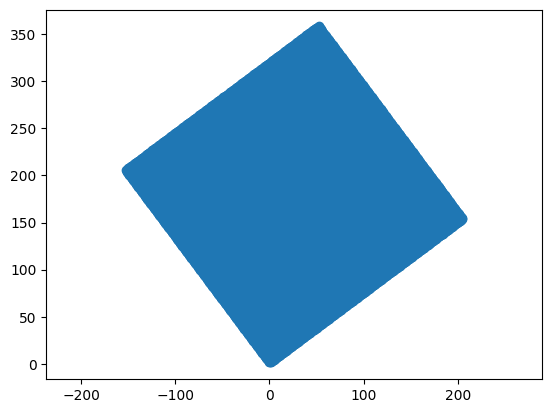

In [61]:
 ### YOUR CODE HERE
import matplotlib.pyplot as plt
print(Xproj.shape)
plt.scatter(Xproj[:,0],Xproj[:,1])
plt.axis('equal')
plt.show()

**Ex7.** Pentru datele de intrare din fișierul pca3d.txt, afişaţi coeficienţii PCA $X_{proj}$ din primele trei coloane (k=3) sub forma unei imagini cu niveluri de gri. Utilizați primele 2 componente ca și coordonatele x și y, iar cea de-a treia valoare ca intensitate în punctul (x, y).

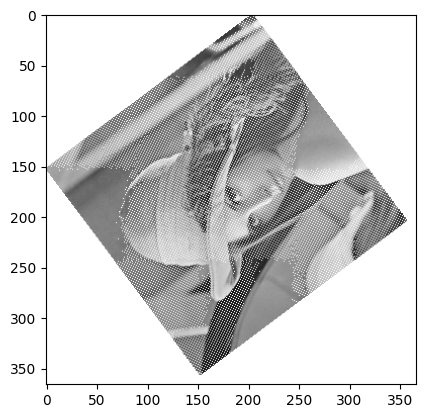

In [62]:
min_values = np.min(Xproj, 0)
max_values = np.max(Xproj, 0)
height = int(max_values[0] - min_values[0]) + 10
width = int(max_values[1] - min_values[1]) + 10
img = np.ones((height,width)) * 255
for i in range(Xproj.shape[0]):
    x = Xproj[i,0] - min_values[0]
    y = Xproj[i,1] - min_values[1]
    g = (Xproj[i,2] -min_values[2]) / (max_values[2] - min_values[2])*255 
    img[int(x), int(y)] = g

plt.imshow(img, cmap='gray')
plt.show()

**Ex8.** Determinați automat numărul de componente principale k care trebuie să fie păstrate astfel încât să se reţină un anumit procent din varianța inițială. De exemplu, găsiți valoarea lui k pentru care aproximarea de ordinul k reține 99% din varianța inițială. Procentajul varianței păstrate este dat de:

$$
\frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^d \lambda_i}
$$

unde $\lambda_i$ reprezintă valoarea proprie de pe poziția i.

In [77]:
vals = np.array(eigenvalues)
vals = np.sort(vals)[::-1]

r = np.cumsum(vals) / np.sum(vals)
threshold = 0.99

var_total = float(np.sum(vals))

cum = 0.0
k = 0
for v in vals:
    cum += float(v)
    k += 1
    if cum / var_total >= threshold:
        break

print(k)
print(cum/var_total*100)





2
99.84506209428422
